**Logistik Regression with Scikit Learn**

In [4]:
# Download Dataset
# Data ini berisi sekitar 10 tahun data pengamatan 
# cuaca harian dari berbagai stasiun cuaca di Australia.
rain_url = 'https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas'
from urllib.request import urlretrieve
urlretrieve(rain_url, 'weatherAUS.csv')

('weatherAUS.csv', <http.client.HTTPMessage at 0x2723d0c56d0>)

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jsphyg/weather-dataset-rattle-package")

print("Path to dataset files:", path)

C:\Users\HELWA\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



Path to dataset files: C:\Users\HELWA\.cache\kagglehub\datasets\jsphyg\weather-dataset-rattle-package\versions\2


In [16]:
import pandas as pd
import os

# Tentukan nama file (dataset ini biasanya bernama weatherAUS.csv)
file_name = "weatherAUS.csv"
full_path = os.path.join(path, file_name)

# Baca file CSV
raw_df = pd.read_csv(full_path)

# Intip 5 data teratas
print(raw_df.head())

# Cek info kolom dan tipe data
print(raw_df.info())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

**Logistic Regression**

Secara sederhana, Logistic Regression adalah algoritma pembelajaran mesin (machine learning) yang digunakan untuk memprediksi probabilitas dari suatu kejadian yang hasilnya bersifat kategori (ya atau tidak).

Meskipun namanya ada kata "Regression", algoritma ini sebenarnya digunakan untuk tugas Klasifikasi.

**Cara Kerja**
- Jika linear regression memprediksi angka kontinu seperti harga rumah, maka Logistic Regression memprediksi peluang dan mengubahnya menjadi angka antara 0 dan 1.

Untuk melakukan ini, Logistic Regression menggunakan fungsi matematika yang disebut **Sigmoid Function** (atau fungsi S).

- Jika hasil fungsi mendekati 1, model memprediksi kejadian itu terjadi (misal: "Besok Hujan").
- Jika hasil fungsi mendekati 0, model memprediksi kejadian itu tidak terjadi (misal: "Besok Tidak Hujan").
- Biasanya digunakan titik potong (threshold) 0.5. Jika di atas 0.5, dikategorikan sebagai "Yes".

**Regression Problem vs Classification Problem**
- Regression problem adalah jika angka yang akan ditebak merupakan angka yang bisa terus berubah atau kontinu. 

**Contoh Masalah**
1. Regression Problem: "Berapa curah hujan (Rainfall) besok dalam satuan milimeter?"
   - Jawabannya bisa: 0 mm, 2.5 mm, 10.2 mm, dst. (Angka bebas).

2. Classification Problem (Logistic Regression): "Apakah besok hujan (RainToday)?"
   - Jawabannya cuma dua: Ya atau Tidak (Kategori).


**Visualisasi Perbedaan**
- Regresi (Linear): Tujuannya adalah membuat garis lurus yang melewati titik-titik tersebut untuk memprediksi angka di titik mana pun pada garis itu.

- Klasifikasi (Logistic): Tujuannya adalah membuat garis pemisah untuk membedakan mana kelompok A dan mana kelompok B.

**Logistic Regression for Solving Classification Problems**
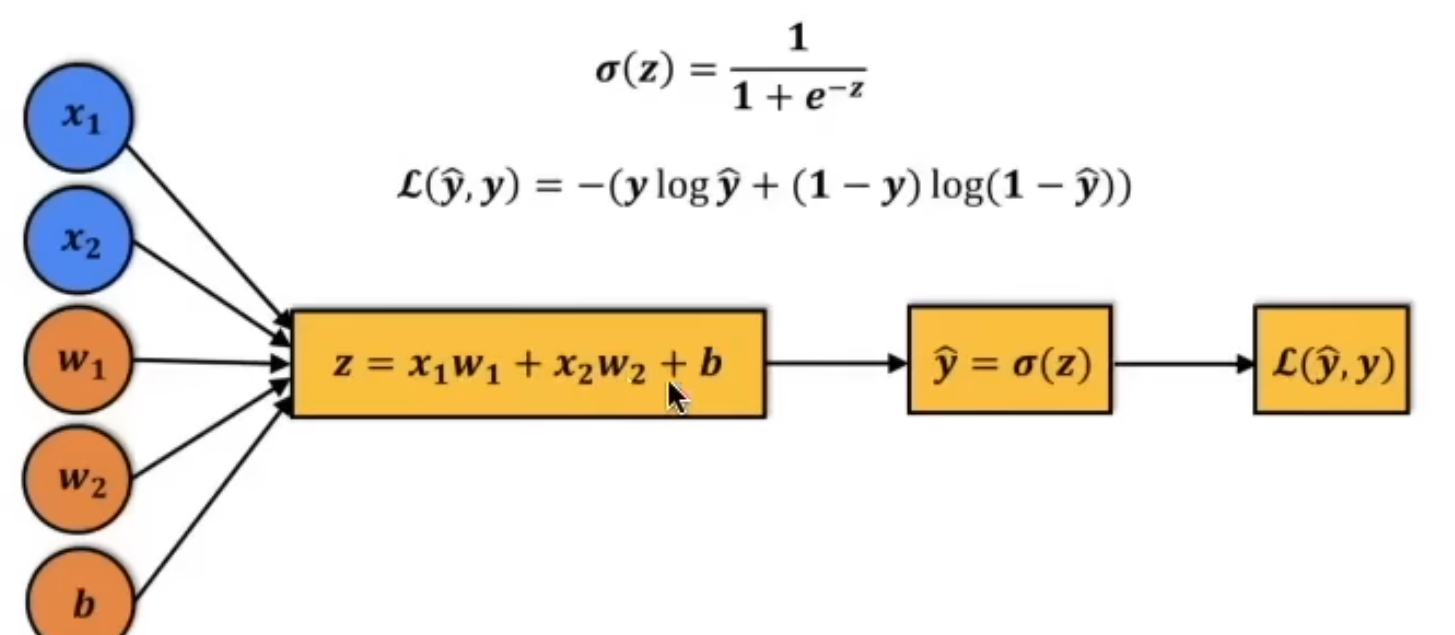

**Fungsi Sigmoid**
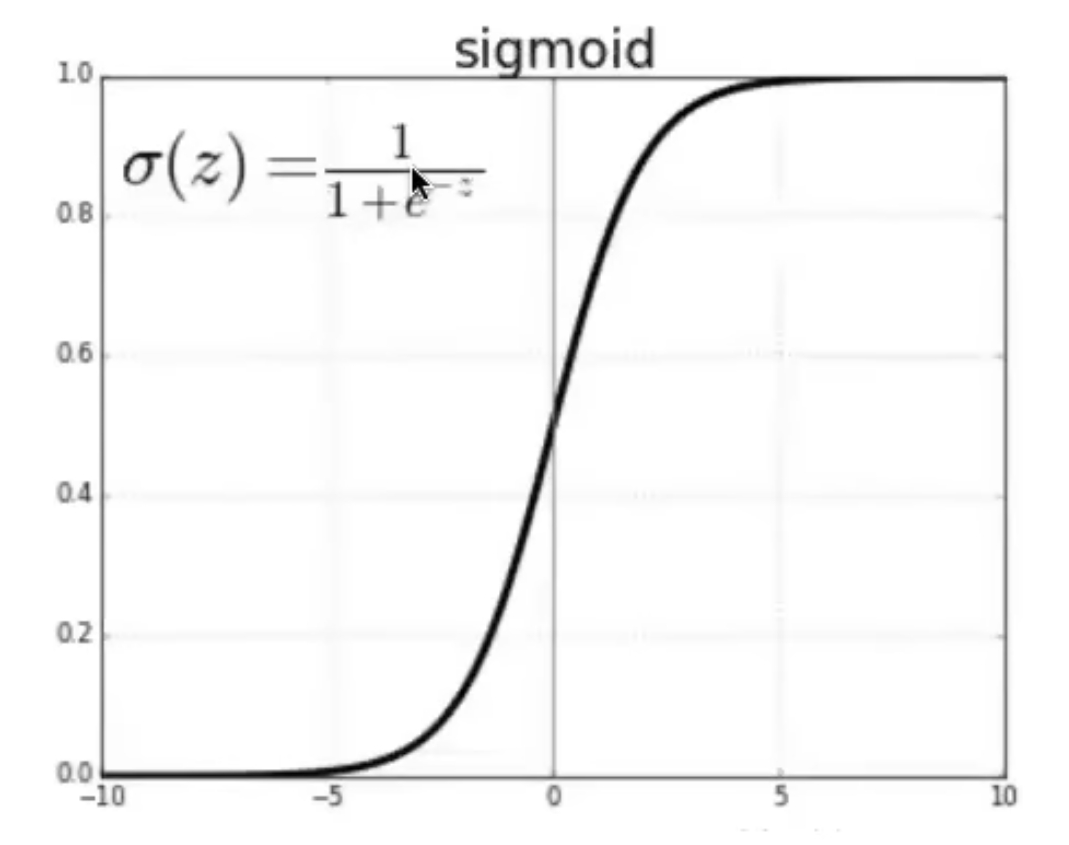

In [17]:
raw_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [18]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [19]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [2]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
import nbformat
print(nbformat.__version__)

5.10.4


In [20]:
import plotly.io as pio
pio.renderers.default = 'colab'
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

**Penjelasan Grafik Lokasi dan Intensitas Hujan**

1. Sumbu X mewakili nama-nama kota di Australia
2. Sumbu Y menunjukkan count atau jumlah hari pengamatan cuaca yang tercatat dalam dataset untuk masing-masing kota.
3. Warna:
   * Biru (No): Hari di mana tidak terjadi hujan
   * Oranye (Yes): Hari di mana terjadi hujan
4. Tinggi total batang menunjukkan seberapa banyak data yang dimiliki untuk kota tersebut.

**Proporsi Warna (Warna Oranye vs Biru)**

Jika bagian Oranye lebih dominan/tinggi dibanding kota lain, berarti kota tersebut lebih sering hujan.

Contoh: Coba lihat Portland atau Cairns, bagian oranye-nya terlihat cukup signifikan proporsinya dibandingkan dengan Uluru atau Alice Springs yang hampir seluruh batangnya berwarna biru (sangat jarang hujan).

Dari histogram ini dapat disimpulkan bahwa secara umum, warna biru lebih mendominasi daripada warna oranye. Artinya dalam dataset ini, hari tidak hujan jauh lebih banyak daripada hari hujan. Selain itu, karena setiap kota memiliki proporsi yang berbeda, ini membuktikan bahwa Location adalah fitur yang sangat berpengaruh. Kota yang jarang hujan/gersang seperti Uluru punya pola yang berbeda total dengan kota pesisir.

Contohnya ketika model memprediksi kondisi hujan di Kota Uluru maka model akan memprediksi "Tidak Hujan" dengan keyakinan yang tinggi. Hal ini disebabkan jumlah data yang sedikit dan hampir tidak ada warna oranye.

In [ ]:
px.histogram(raw_df, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

Grafik di atas menunjukkan distribusi suhu pada jam 3 sore (Temp3pm) dan hubungannya dengan kejadian hujan di hari berikutnya (RainTomorrow).

1. Sumbu X menunjukkan suhu dalam derajat Celcius pada jam 3 sore.
2. Sumbu Y menunjukkan jumlah frekuensi atau seberapa sering suhu tersebut muncul dalam catatan data.
3. Warna Biru (No): Frekuensi hari yang besoknya tidak hujan.
4. Warna Oranye (Yes): Frekuensi hari yang besoknya hujan.
   
- Pada pusat data kebanyakan suhu di Australia pada jam 3 sore berkumpul di kisaran 15 hingga 25 derajat Celcius, ditunjukkan dengan area di mana "gunung"-nya paling tinggi.
- Pola hujan (oranye) di mana warna oranye terlihat lebih tebal/banyak pada suhu yang moderat yaitu sekitar 15 hingga 20 derajat Celcius.
- Suhu ekstrim yaitu di atas 40 derajat Celcius, warna oranye hampir tidak terlihat. Hal ini berarti jika jam 3 sore sudah sangat panas, maka kemungkinan besok tidak hujan. 

In [ ]:
px.histogram(raw_df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

In [ ]:
px.scatter(raw_df.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

In [ ]:
px.scatter(raw_df.sample(2000),
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

**Working with a Sample**

In [13]:
use_sample = True

In [14]:
sample_fraction = 0.1

In [21]:
if use_sample:
    raw_df = raw_df.sample(frac=sample_fraction).copy()

**Training, Validation, and Test Sets**

1. Training Set: 
   * Fungsi: Model melihat soal (fitur seperti suhu, kelembapan) dan jawabannya (hujan/tidak), lalu mencoba mencari pola.
   * Proses: Model menghitung loss (kesalahan) dan memperbaiki dirinya sendiri (menyesuaikan weights) agar tebakannya semakin akurat.
   * Analogi: Seperti kamu membaca buku teks dan mengerjakan soal latihan di rumah.
2. Validation Set
   * Fungsi: Digunakan untuk mengatur "setelan" model atau Hyperparameters (misalnya: seberapa cepat model belajar, atau seberapa ketat aturan regulerisasinya).
   * Pentingnya: Membantu kita memilih versi model yang paling baik sebelum benar-benar selesai. Jika performa di Training Set bagus tapi di Validation Set buruk, berarti model kamu mengalami Overfitting (hanya menghafal, tidak paham pola).
   * Analogi: Seperti mengikuti simulasi ujian (Try Out). Kamu belum ikut ujian asli, tapi kamu jadi tahu bagian mana yang perlu diperbaiki.
3. Test Set
   * Fungsi: Digunakan hanya sekali di akhir untuk memberikan laporan final tentang seberapa hebat akurasi model tersebut di dunia nyata.
   * Syarat: Data ini harus benar-benar mencerminkan kondisi lapangan yang akan dihadapi nanti.
   * Analogi: Ini adalah hari H Ujian Nasional. Kamu tidak boleh melihat kunci jawaban sebelumnya, dan hasil dari sini adalah nilai akhirmu.

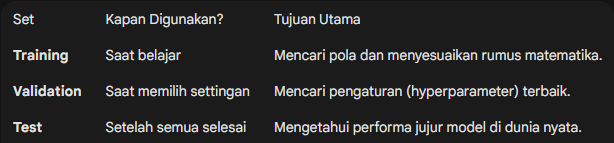

In [ ]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [23]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (8447, 23)
val_df.shape : (2816, 23)
test_df.shape : (2816, 23)


In [24]:
print('Total data:   ', len(raw_df))
print('Training set: ', len(train_df))
print('Validation:   ', len(val_df))
print('Test set:     ', len(test_df))

Total data:    14079
Training set:  8447
Validation:    2816
Test set:      2816


In [25]:
raw_df

Date          Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
15724   2010-09-10         Newcastle     11.0     24.5       2.8          NaN   
64831   2010-10-03  MelbourneAirport      6.8     24.0       0.0          3.8   
54362   2015-06-17       MountGinini      4.2      5.4      32.4          NaN   
71467   2012-01-10           Mildura     13.2     25.9       0.0          7.6   
101126  2013-07-30      MountGambier      2.9     13.4       4.2          1.4   
...            ...               ...      ...      ...       ...          ...   
46065   2009-02-21          Canberra     12.9     27.3       0.0          4.0   
116858  2015-05-17        PearceRAAF     11.9     19.7      19.4          NaN   
92623   2015-09-08         GoldCoast     15.5     26.7       0.8          NaN   
104925  2015-09-28         Nuriootpa      3.0     19.7       0.0          NaN   
50520   2013-04-06       Tuggeranong      6.3     22.5       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
15724        NaN         NaN            NaN         NW  ...        75.0   
64831       11.9           N           48.0         NE  ...        71.0   
54362        NaN         WNW           31.0          E  ...        97.0   
71467        8.5          SW           46.0         SW  ...        69.0   
101126       4.0           W           26.0         NW  ...        77.0   
...          ...         ...            ...        ...  ...         ...   
46065       10.9           E           44.0        SSE  ...        71.0   
116858       1.5          NW           63.0          N  ...        81.0   
92623        NaN          NW           41.0         NW  ...        63.0   
104925       8.4           W           37.0         NW  ...        48.0   
50520        NaN           E           28.0        NaN  ...        85.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
15724          36.0          NaN          NaN       1.0       3.0     19.5   
64831          43.0       1027.9       1024.5       1.0       3.0     15.1   
54362          97.0          NaN          NaN       NaN       NaN      4.4   
71467          36.0       1016.0       1013.7       7.0       7.0     18.0   
101126         64.0       1024.1       1023.1       3.0       7.0      9.8   
...             ...          ...          ...       ...       ...      ...   
46065          37.0       1013.8       1011.2       7.0       3.0     18.2   
116858         92.0       1007.0       1004.9       1.0       8.0     16.0   
92623          51.0       1019.6       1014.0       NaN       NaN     21.1   
104925         37.0       1020.8       1018.1       7.0       2.0     13.9   
50520          38.0       1028.7       1023.9       NaN       NaN     11.7   

        Temp3pm  RainToday  RainTomorrow  
15724      23.8        Yes            No  
64831      22.6         No            No  
54362       4.4        Yes           Yes  
71467      23.9         No            No  
101126     11.8        Yes            No  
...         ...        ...           ...  
46065      26.2         No            No  
116858     15.6        Yes           Yes  
92623      24.2         No            No  
104925     18.2         No            No  
50520      21.5         No           Yes  

[14079 rows x 23 columns]

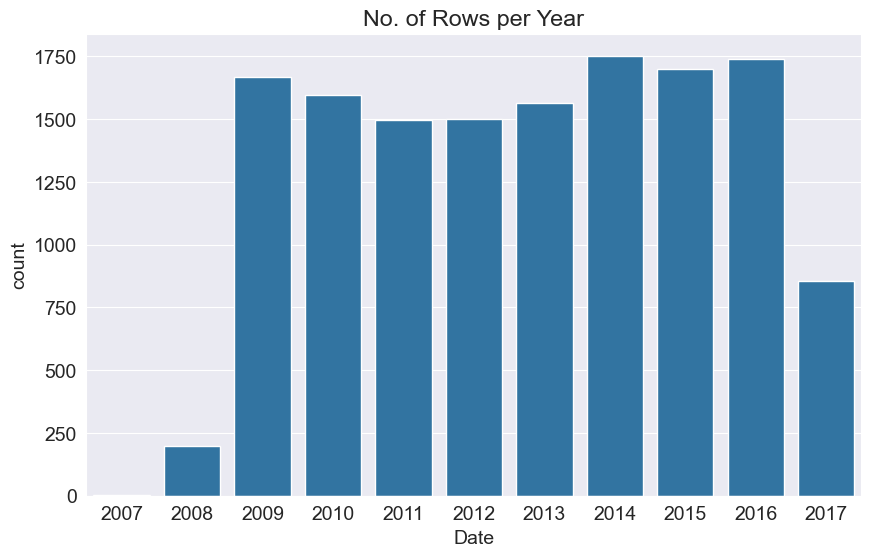

In [27]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [29]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (9784, 23)
val_df.shape : (1699, 23)
test_df.shape : (2596, 23)


In [30]:
print('Total data:   ', len(raw_df))
print('Training set: ', len(train_df))
print('Validation:   ', len(val_df))
print('Test set:     ', len(test_df))

Total data:    14079
Training set:  9784
Validation:    1699
Test set:      2596


In [31]:
train_df

Date          Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
15724   2010-09-10         Newcastle     11.0     24.5       2.8          NaN   
64831   2010-10-03  MelbourneAirport      6.8     24.0       0.0          3.8   
71467   2012-01-10           Mildura     13.2     25.9       0.0          7.6   
101126  2013-07-30      MountGambier      2.9     13.4       4.2          1.4   
124507  2010-11-16        SalmonGums      1.7     26.2       0.0          NaN   
...            ...               ...      ...      ...       ...          ...   
136579  2010-04-23      AliceSprings     13.7     29.1       0.0          5.8   
13944   2014-05-21             Moree      9.8     26.4       0.0          3.2   
50986   2014-07-16       Tuggeranong      5.8     11.8      10.2          NaN   
46065   2009-02-21          Canberra     12.9     27.3       0.0          4.0   
50520   2013-04-06       Tuggeranong      6.3     22.5       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
15724        NaN         NaN            NaN         NW  ...        75.0   
64831       11.9           N           48.0         NE  ...        71.0   
71467        8.5          SW           46.0         SW  ...        69.0   
101126       4.0           W           26.0         NW  ...        77.0   
124507       NaN         SSE           39.0        ENE  ...        47.0   
...          ...         ...            ...        ...  ...         ...   
136579      11.2         ESE           26.0          W  ...        59.0   
13944        9.9          SW           31.0        ENE  ...        58.0   
50986        NaN          NW           33.0        WNW  ...        99.0   
46065       10.9           E           44.0        SSE  ...        71.0   
50520        NaN           E           28.0        NaN  ...        85.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
15724          36.0          NaN          NaN       1.0       3.0     19.5   
64831          43.0       1027.9       1024.5       1.0       3.0     15.1   
71467          36.0       1016.0       1013.7       7.0       7.0     18.0   
101126         64.0       1024.1       1023.1       3.0       7.0      9.8   
124507         19.0          NaN          NaN       NaN       NaN     18.0   
...             ...          ...          ...       ...       ...      ...   
136579         31.0       1019.2       1014.3       0.0       1.0     21.1   
13944          30.0       1024.2       1020.9       0.0       2.0     17.5   
50986          66.0       1014.1       1012.4       NaN       NaN      7.9   
46065          37.0       1013.8       1011.2       7.0       3.0     18.2   
50520          38.0       1028.7       1023.9       NaN       NaN     11.7   

        Temp3pm  RainToday  RainTomorrow  
15724      23.8        Yes            No  
64831      22.6         No            No  
71467      23.9         No            No  
101126     11.8        Yes            No  
124507     25.3         No            No  
...         ...        ...           ...  
136579     28.7         No            No  
13944      25.4         No            No  
50986      10.4        Yes            No  
46065      26.2         No            No  
50520      21.5         No           Yes  

[9784 rows x 23 columns]

In [32]:
val_df

Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
54362   2015-06-17  MountGinini      4.2      5.4      32.4          NaN   
2315    2015-07-02       Albury      4.6     12.1       0.8          NaN   
44813   2015-05-14   Wollongong      8.9     18.1       1.6          NaN   
60635   2015-12-27      Bendigo      9.3     23.3       1.6          NaN   
104761  2015-04-17    Nuriootpa     11.0     14.5      13.0          2.0   
...            ...          ...      ...      ...       ...          ...   
32971   2015-12-25       Sydney     17.5     25.2       0.0          7.0   
126036  2015-04-22   SalmonGums      1.4     23.9       0.0          NaN   
116858  2015-05-17   PearceRAAF     11.9     19.7      19.4          NaN   
92623   2015-09-08    GoldCoast     15.5     26.7       0.8          NaN   
104925  2015-09-28    Nuriootpa      3.0     19.7       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
54362        NaN         WNW           31.0          E  ...        97.0   
2315         NaN         WSW           50.0          N  ...        87.0   
44813        NaN         WSW           37.0          W  ...        45.0   
60635        NaN         SSE           46.0          S  ...        55.0   
104761       0.0           E           33.0          E  ...        93.0   
...          ...         ...            ...        ...  ...         ...   
32971        9.6         ENE           35.0        ENE  ...        55.0   
126036       NaN         SSW           17.0          N  ...        40.0   
116858       1.5          NW           63.0          N  ...        81.0   
92623        NaN          NW           41.0         NW  ...        63.0   
104925       8.4           W           37.0         NW  ...        48.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
54362          97.0          NaN          NaN       NaN       NaN      4.4   
2315           52.0       1022.4       1022.1       NaN       1.0      6.9   
44813          40.0       1024.4       1024.3       NaN       NaN     13.1   
60635          31.0       1021.9       1021.1       1.0       2.0     13.4   
104761         89.0       1019.9       1015.3       8.0       8.0     11.7   
...             ...          ...          ...       ...       ...      ...   
32971          48.0       1018.7       1015.4       5.0       4.0     21.8   
126036         24.0          NaN          NaN       NaN       NaN     17.9   
116858         92.0       1007.0       1004.9       1.0       8.0     16.0   
92623          51.0       1019.6       1014.0       NaN       NaN     21.1   
104925         37.0       1020.8       1018.1       7.0       2.0     13.9   

        Temp3pm  RainToday  RainTomorrow  
54362       4.4        Yes           Yes  
2315       11.3         No            No  
44813      17.5        Yes            No  
60635      22.1        Yes            No  
104761     14.1        Yes            No  
...         ...        ...           ...  
32971      24.5         No            No  
126036     23.4         No            No  
116858     15.6        Yes           Yes  
92623      24.2         No            No  
104925     18.2         No            No  

[1699 rows x 23 columns]

In [33]:
test_df

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
92841   2016-04-13      GoldCoast     19.5     26.6       2.6          NaN   
99028   2016-02-27       Adelaide     13.5     25.4       0.0          NaN   
39155   2016-06-08     WaggaWagga      9.3     15.3       1.8          0.4   
23933   2016-12-13  NorfolkIsland     16.3     22.5       0.0          6.0   
45549   2017-05-19     Wollongong     17.3     20.1       0.0          NaN   
...            ...            ...      ...      ...       ...          ...   
8982    2017-04-11          Cobar      7.3     23.1       0.0          NaN   
129497  2016-07-20        Walpole      9.7     16.9       0.0          NaN   
138855  2016-10-13   AliceSprings      6.5     26.6       0.0         10.0   
11569   2016-02-14   CoffsHarbour     16.2     27.6       0.0          NaN   
42410   2017-02-09    Williamtown     20.5     32.8       1.4          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
92841        NaN         SSE           54.0          S  ...        68.0   
99028        NaN         WNW           31.0        NaN  ...        72.0   
39155        NaN           N           33.0          N  ...        90.0   
23933        NaN         ESE           31.0         SE  ...        67.0   
45549        NaN          NE           52.0         NE  ...        83.0   
...          ...         ...            ...        ...  ...         ...   
8982         NaN           W           28.0          S  ...        56.0   
129497       NaN          NW           56.0        NNW  ...        74.0   
138855       NaN           E           41.0          E  ...        26.0   
11569        NaN           E           26.0        WSW  ...        69.0   
42410        NaN          NE           33.0        NNE  ...        75.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
92841          66.0       1022.5       1021.6       NaN       NaN     24.2   
99028          49.0       1023.8       1020.9       NaN       NaN     18.2   
39155          63.0       1013.3       1011.1       8.0       8.0     11.6   
23933          64.0       1022.5       1020.4       2.0       2.0     20.0   
45549          87.0       1025.4       1020.9       8.0       8.0     19.0   
...             ...          ...          ...       ...       ...      ...   
8982           30.0       1021.7       1018.0       NaN       NaN     13.4   
129497         69.0       1013.6       1008.6       NaN       NaN     11.2   
138855         11.0       1020.7       1015.7       NaN       NaN     19.3   
11569          60.0       1011.1       1008.7       NaN       NaN     23.9   
42410          49.0       1018.3       1013.3       1.0       NaN     25.6   

        Temp3pm  RainToday  RainTomorrow  
92841      24.5        Yes           Yes  
99028      24.7         No            No  
39155      14.7        Yes            No  
23933      21.3         No            No  
45549      19.0         No           Yes  
...         ...        ...           ...  
8982       21.9         No            No  
129497     15.3         No           Yes  
138855     25.9         No            No  
11569      26.6         No            No  
42410      31.9        Yes            No  

[2596 rows x 23 columns]

**Identifying Input and Target Columns**

Terkadang tidak semua kolom yang ada di dataset diperlukan untuk training model

In [34]:
raw_df

Date          Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
15724   2010-09-10         Newcastle     11.0     24.5       2.8          NaN   
64831   2010-10-03  MelbourneAirport      6.8     24.0       0.0          3.8   
54362   2015-06-17       MountGinini      4.2      5.4      32.4          NaN   
71467   2012-01-10           Mildura     13.2     25.9       0.0          7.6   
101126  2013-07-30      MountGambier      2.9     13.4       4.2          1.4   
...            ...               ...      ...      ...       ...          ...   
46065   2009-02-21          Canberra     12.9     27.3       0.0          4.0   
116858  2015-05-17        PearceRAAF     11.9     19.7      19.4          NaN   
92623   2015-09-08         GoldCoast     15.5     26.7       0.8          NaN   
104925  2015-09-28         Nuriootpa      3.0     19.7       0.0          NaN   
50520   2013-04-06       Tuggeranong      6.3     22.5       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
15724        NaN         NaN            NaN         NW  ...        75.0   
64831       11.9           N           48.0         NE  ...        71.0   
54362        NaN         WNW           31.0          E  ...        97.0   
71467        8.5          SW           46.0         SW  ...        69.0   
101126       4.0           W           26.0         NW  ...        77.0   
...          ...         ...            ...        ...  ...         ...   
46065       10.9           E           44.0        SSE  ...        71.0   
116858       1.5          NW           63.0          N  ...        81.0   
92623        NaN          NW           41.0         NW  ...        63.0   
104925       8.4           W           37.0         NW  ...        48.0   
50520        NaN           E           28.0        NaN  ...        85.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
15724          36.0          NaN          NaN       1.0       3.0     19.5   
64831          43.0       1027.9       1024.5       1.0       3.0     15.1   
54362          97.0          NaN          NaN       NaN       NaN      4.4   
71467          36.0       1016.0       1013.7       7.0       7.0     18.0   
101126         64.0       1024.1       1023.1       3.0       7.0      9.8   
...             ...          ...          ...       ...       ...      ...   
46065          37.0       1013.8       1011.2       7.0       3.0     18.2   
116858         92.0       1007.0       1004.9       1.0       8.0     16.0   
92623          51.0       1019.6       1014.0       NaN       NaN     21.1   
104925         37.0       1020.8       1018.1       7.0       2.0     13.9   
50520          38.0       1028.7       1023.9       NaN       NaN     11.7   

        Temp3pm  RainToday  RainTomorrow  
15724      23.8        Yes            No  
64831      22.6         No            No  
54362       4.4        Yes           Yes  
71467      23.9         No            No  
101126     11.8        Yes            No  
...         ...        ...           ...  
46065      26.2         No            No  
116858     15.6        Yes           Yes  
92623      24.2         No            No  
104925     18.2         No            No  
50520      21.5         No           Yes  

[14079 rows x 23 columns]

In [35]:
input_cols = list(train_df.columns) [1:-1] 
# RainTomorrow tidak disertakan di input data karena dia merupakan target data
# Date pada data tidak diperlukan untuk training model
target_col = 'RainTomorrow'

In [36]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [37]:
target_col

'RainTomorrow'

In [38]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [39]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [40]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [41]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
15724          Newcastle     11.0     24.5       2.8          NaN       NaN   
64831   MelbourneAirport      6.8     24.0       0.0          3.8      11.9   
71467            Mildura     13.2     25.9       0.0          7.6       8.5   
101126      MountGambier      2.9     13.4       4.2          1.4       4.0   
124507        SalmonGums      1.7     26.2       0.0          NaN       NaN   
...                  ...      ...      ...       ...          ...       ...   
136579      AliceSprings     13.7     29.1       0.0          5.8      11.2   
13944              Moree      9.8     26.4       0.0          3.2       9.9   
50986        Tuggeranong      5.8     11.8      10.2          NaN       NaN   
46065           Canberra     12.9     27.3       0.0          4.0      10.9   
50520        Tuggeranong      6.3     22.5       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
15724          NaN            NaN         NW         NW  ...          19.0   
64831            N           48.0         NE          N  ...          28.0   
71467           SW           46.0         SW        WSW  ...          24.0   
101126           W           26.0         NW        NNW  ...          15.0   
124507         SSE           39.0        ENE          S  ...          15.0   
...            ...            ...        ...        ...  ...           ...   
136579         ESE           26.0          W          S  ...          11.0   
13944           SW           31.0        ENE          S  ...          11.0   
50986           NW           33.0        WNW        WNW  ...          19.0   
46065            E           44.0        SSE          N  ...           9.0   
50520            E           28.0        NaN         NE  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
15724          75.0         36.0          NaN          NaN       1.0   
64831          71.0         43.0       1027.9       1024.5       1.0   
71467          69.0         36.0       1016.0       1013.7       7.0   
101126         77.0         64.0       1024.1       1023.1       3.0   
124507         47.0         19.0          NaN          NaN       NaN   
...             ...          ...          ...          ...       ...   
136579         59.0         31.0       1019.2       1014.3       0.0   
13944          58.0         30.0       1024.2       1020.9       0.0   
50986          99.0         66.0       1014.1       1012.4       NaN   
46065          71.0         37.0       1013.8       1011.2       7.0   
50520          85.0         38.0       1028.7       1023.9       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
15724        3.0     19.5     23.8        Yes  
64831        3.0     15.1     22.6         No  
71467        7.0     18.0     23.9         No  
101126       7.0      9.8     11.8        Yes  
124507       NaN     18.0     25.3         No  
...          ...      ...      ...        ...  
136579       1.0     21.1     28.7         No  
13944        2.0     17.5     25.4         No  
50986        NaN      7.9     10.4        Yes  
46065        3.0     18.2     26.2         No  
50520        NaN     11.7     21.5         No  

[9784 rows x 21 columns]

In [42]:
train_targets

15724      No
64831      No
71467      No
101126     No
124507     No
         ... 
136579     No
13944      No
50986      No
46065      No
50520     Yes
Name: RainTomorrow, Length: 9784, dtype: object

In [44]:
import numpy as np

In [45]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [46]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [47]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [48]:
train_inputs[numeric_cols].describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  9754.000000  9759.000000  9784.000000  6149.000000  5792.000000   
mean     11.923570    22.959893     2.424652     5.253391     7.617403   
std       6.361343     6.955580     9.772966     3.934435     3.784111   
min      -7.600000    -3.100000     0.000000     0.000000     0.000000   
25%       7.400000    17.900000     0.000000     2.600000     4.900000   
50%      11.700000    22.300000     0.000000     4.600000     8.500000   
75%      16.500000    27.700000     0.600000     7.200000    10.600000   
max      31.200000    45.800000   278.400000    81.200000    14.100000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    9111.000000   9697.000000   9672.000000  9689.000000  9665.000000   
mean       40.084403     13.977209     18.852667    68.897822    51.648836   
std        13.549851      8.936023      8.862984    18.812866    20.726918   
min         7.000000      0.000000      0.000000     1.000000     1.000000   
25%        31.000000      7.000000     13.000000    57.000000    37.000000   
50%        39.000000     13.000000     19.000000    70.000000    52.000000   
75%        48.000000     19.000000     24.000000    83.000000    66.000000   
max       135.000000     65.000000     72.000000   100.000000   100.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8899.000000  8899.000000  6291.000000  6194.000000  9738.000000   
mean   1017.737353  1015.372677     4.316166     4.435906    16.727018   
std       7.059958     6.989072     2.889874     2.705380     6.380898   
min     980.500000   979.000000     0.000000     0.000000    -5.500000   
25%    1013.200000  1010.600000     1.000000     2.000000    12.100000   
50%    1017.800000  1015.400000     5.000000     5.000000    16.450000   
75%    1022.500000  1020.100000     7.000000     7.000000    21.300000   
max    1040.400000  1038.900000     8.000000     8.000000    40.200000   

           Temp3pm  
count  9727.000000  
mean     21.467369  
std       6.799683  
min      -3.700000  
25%      16.500000  
50%      20.800000  
75%      26.100000  
max      44.100000

In [49]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

**Inputing Missing Numeric Data**

Dalam Machine Learning, data yang kosong (NaN) tidak bisa dimasukkan ke dalam model seperti Logistic Regression karena akan menyebabkan error pada saat perhitungan matematikanya.

Oleh karena itu, kita menggunakan SimpleImputer dari library Scikit-Learn adalah solusi otomatis untuk mengisi nilai-nilai yang hilang tersebut.

**Perbandingan Strategi SimpleaImputer**
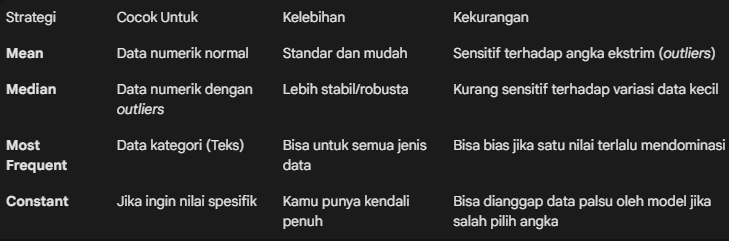

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [51]:
raw_df[numeric_cols].isna().sum()

MinTemp            49
MaxTemp            35
Rainfall            0
Evaporation      5985
Sunshine         6677
WindGustSpeed     904
WindSpeed9am      113
WindSpeed3pm      250
Humidity9am       150
Humidity3pm       346
Pressure9am      1372
Pressure3pm      1373
Cloud9am         5283
Cloud3pm         5599
Temp9am            59
Temp3pm           249
dtype: int64

In [52]:
train_inputs[numeric_cols].isna().sum()

MinTemp            30
MaxTemp            25
Rainfall            0
Evaporation      3635
Sunshine         3992
WindGustSpeed     673
WindSpeed9am       87
WindSpeed3pm      112
Humidity9am        95
Humidity3pm       119
Pressure9am       885
Pressure3pm       885
Cloud9am         3493
Cloud3pm         3590
Temp9am            46
Temp3pm            57
dtype: int64

In [53]:
raw_df[numeric_cols]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
15724      11.0     24.5       2.8          NaN       NaN            NaN   
64831       6.8     24.0       0.0          3.8      11.9           48.0   
54362       4.2      5.4      32.4          NaN       NaN           31.0   
71467      13.2     25.9       0.0          7.6       8.5           46.0   
101126      2.9     13.4       4.2          1.4       4.0           26.0   
...         ...      ...       ...          ...       ...            ...   
46065      12.9     27.3       0.0          4.0      10.9           44.0   
116858     11.9     19.7      19.4          NaN       1.5           63.0   
92623      15.5     26.7       0.8          NaN       NaN           41.0   
104925      3.0     19.7       0.0          NaN       8.4           37.0   
50520       6.3     22.5       0.0          NaN       NaN           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
15724            9.0          19.0         75.0         36.0          NaN   
64831            9.0          28.0         71.0         43.0       1027.9   
54362            7.0          13.0         97.0         97.0          NaN   
71467           15.0          24.0         69.0         36.0       1016.0   
101126           7.0          15.0         77.0         64.0       1024.1   
...              ...           ...          ...          ...          ...   
46065            7.0           9.0         71.0         37.0       1013.8   
116858          24.0          30.0         81.0         92.0       1007.0   
92623           22.0          19.0         63.0         51.0       1019.6   
104925           2.0          24.0         48.0         37.0       1020.8   
50520            0.0          13.0         85.0         38.0       1028.7   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
15724           NaN       1.0       3.0     19.5     23.8  
64831        1024.5       1.0       3.0     15.1     22.6  
54362           NaN       NaN       NaN      4.4      4.4  
71467        1013.7       7.0       7.0     18.0     23.9  
101126       1023.1       3.0       7.0      9.8     11.8  
...             ...       ...       ...      ...      ...  
46065        1011.2       7.0       3.0     18.2     26.2  
116858       1004.9       1.0       8.0     16.0     15.6  
92623        1014.0       NaN       NaN     21.1     24.2  
104925       1018.1       7.0       2.0     13.9     18.2  
50520        1023.9       NaN       NaN     11.7     21.5  

[14079 rows x 16 columns]

In [54]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [57]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
list(imputer.statistics_)
# Digunakan untuk melihat daftar angka yang akan digunakan untuk mengisi
# nilai kodong (NaN) di setiap kolom numerik.

[np.float64(12.109586600142551),
 np.float64(23.15142409569923),
 np.float64(2.362930605866894),
 np.float64(5.400864838151717),
 np.float64(7.633085652526344),
 np.float64(39.78254269449715),
 np.float64(13.8798510668767),
 np.float64(18.646829127196472),
 np.float64(69.01335343527892),
 np.float64(51.71033277506736),
 np.float64(1017.8110254190603),
 np.float64(1015.4142338265385),
 np.float64(4.46987266939518),
 np.float64(4.513679245283019),
 np.float64(16.899415121255352),
 np.float64(21.611554591467822)]

In [58]:
train_inputs[numeric_cols]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
15724      11.0     24.5       2.8          NaN       NaN            NaN   
64831       6.8     24.0       0.0          3.8      11.9           48.0   
71467      13.2     25.9       0.0          7.6       8.5           46.0   
101126      2.9     13.4       4.2          1.4       4.0           26.0   
124507      1.7     26.2       0.0          NaN       NaN           39.0   
...         ...      ...       ...          ...       ...            ...   
136579     13.7     29.1       0.0          5.8      11.2           26.0   
13944       9.8     26.4       0.0          3.2       9.9           31.0   
50986       5.8     11.8      10.2          NaN       NaN           33.0   
46065      12.9     27.3       0.0          4.0      10.9           44.0   
50520       6.3     22.5       0.0          NaN       NaN           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
15724            9.0          19.0         75.0         36.0          NaN   
64831            9.0          28.0         71.0         43.0       1027.9   
71467           15.0          24.0         69.0         36.0       1016.0   
101126           7.0          15.0         77.0         64.0       1024.1   
124507           9.0          15.0         47.0         19.0          NaN   
...              ...           ...          ...          ...          ...   
136579           6.0          11.0         59.0         31.0       1019.2   
13944           11.0          11.0         58.0         30.0       1024.2   
50986            6.0          19.0         99.0         66.0       1014.1   
46065            7.0           9.0         71.0         37.0       1013.8   
50520            0.0          13.0         85.0         38.0       1028.7   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
15724           NaN       1.0       3.0     19.5     23.8  
64831        1024.5       1.0       3.0     15.1     22.6  
71467        1013.7       7.0       7.0     18.0     23.9  
101126       1023.1       3.0       7.0      9.8     11.8  
124507          NaN       NaN       NaN     18.0     25.3  
...             ...       ...       ...      ...      ...  
136579       1014.3       0.0       1.0     21.1     28.7  
13944        1020.9       0.0       2.0     17.5     25.4  
50986        1012.4       NaN       NaN      7.9     10.4  
46065        1011.2       7.0       3.0     18.2     26.2  
50520        1023.9       NaN       NaN     11.7     21.5  

[9784 rows x 16 columns]

In [ ]:
imputer.transform(train_inputs[numeric_cols])

array([[11.        , 24.5       ,  2.8       , ...,  3.        ,
        19.5       , 23.8       ],
       [ 6.8       , 24.        ,  0.        , ...,  3.        ,
        15.1       , 22.6       ],
       [13.2       , 25.9       ,  0.        , ...,  7.        ,
        18.        , 23.9       ],
       ...,
       [ 5.8       , 11.8       , 10.2       , ...,  4.51367925,
         7.9       , 10.4       ],
       [12.9       , 27.3       ,  0.        , ...,  3.        ,
        18.2       , 26.2       ],
       [ 6.3       , 22.5       ,  0.        , ...,  4.51367925,
        11.7       , 21.5       ]])

In [61]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [62]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

**Scalling Numeric Features**

In [63]:
raw_df[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall  Evaporation     Sunshine  \
count  14030.000000  14044.000000  14079.000000  8094.000000  7402.000000   
mean      12.109587     23.151424      2.362931     5.400865     7.633086   
std        6.398908      7.096067      9.176242     4.092945     3.789201   
min       -7.600000     -4.800000      0.000000     0.000000     0.000000   
25%        7.500000     17.900000      0.000000     2.600000     4.900000   
50%       11.900000     22.500000      0.000000     4.600000     8.500000   
75%       16.700000     28.100000      0.800000     7.200000    10.700000   
max       31.200000     45.800000    278.400000    81.200000    14.100000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   13175.000000  13966.000000  13829.000000  13929.000000  13733.000000   
mean       39.782543     13.879851     18.646829     69.013353     51.710333   
std        13.453917      8.780778      8.784359     19.001639     20.819620   
min         7.000000      0.000000      0.000000      1.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     65.000000     72.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm     Cloud9am     Cloud3pm       Temp9am  \
count  12707.000000  12706.000000  8796.000000  8480.000000  14020.000000   
mean    1017.811025   1015.414234     4.469873     4.513679     16.899415   
std        7.092392      7.041444     2.893623     2.723929      6.470793   
min      980.500000    979.000000     0.000000     0.000000     -7.200000   
25%     1013.200000   1010.600000     1.000000     2.000000     12.200000   
50%     1017.900000   1015.400000     5.000000     5.000000     16.600000   
75%     1022.600000   1020.200000     7.000000     7.000000     21.500000   
max     1040.400000   1038.900000     8.000000     8.000000     40.200000   

            Temp3pm  
count  13830.000000  
mean      21.611555  
std        6.922888  
min       -5.400000  
25%       16.600000  
50%       21.000000  
75%       26.300000  
max       44.100000

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [71]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [70]:
print('Minimum: ')
list(scaler.data_min_)

Minimum: 


[np.float64(-7.6),
 np.float64(-4.8),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(7.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(980.5),
 np.float64(979.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-7.2),
 np.float64(-5.4)]

In [72]:
print('Maximum: ')
list(scaler.data_max_)

Maximum: 


[np.float64(31.2),
 np.float64(45.8),
 np.float64(278.4),
 np.float64(81.2),
 np.float64(14.1),
 np.float64(135.0),
 np.float64(65.0),
 np.float64(72.0),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(1040.4),
 np.float64(1038.9),
 np.float64(8.0),
 np.float64(8.0),
 np.float64(40.2),
 np.float64(44.1)]

In [73]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [74]:
train_inputs[numeric_cols].describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  9784.000000  9784.000000  9784.000000  9784.000000  9784.000000   
mean      0.503199     0.548624     0.008709     0.065372     0.540695   
std       0.163701     0.137286     0.035104     0.038421     0.206484   
min       0.000000     0.033597     0.000000     0.000000     0.000000   
25%       0.386598     0.448617     0.000000     0.044335     0.531915   
50%       0.500000     0.536561     0.000000     0.066513     0.541354   
75%       0.618557     0.642292     0.002155     0.068966     0.652482   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    9784.000000   9784.000000   9784.000000  9784.000000  9784.000000   
mean        0.258310      0.215021      0.261810     0.685848     0.516496   
std         0.102154      0.136865      0.122391     0.189104     0.206005   
min         0.000000      0.000000      0.000000     0.000000     0.010000   
25%         0.187500      0.107692      0.180556     0.565657     0.370000   
50%         0.250000      0.200000      0.263889     0.696970     0.520000   
75%         0.304688      0.292308      0.333333     0.828283     0.660000   
max         1.000000      1.000000      1.000000     1.000000     1.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  9784.000000  9784.000000  9784.000000  9784.000000  9784.000000   
mean      0.621770     0.607286     0.546380     0.558055     0.504807   
std       0.112406     0.111277     0.289799     0.269103     0.134301   
min       0.000000     0.000000     0.000000     0.000000     0.035865   
25%       0.554257     0.535893     0.375000     0.375000     0.407173   
50%       0.622889     0.607917     0.558734     0.564210     0.500000   
75%       0.692821     0.677796     0.750000     0.750000     0.601266   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Temp3pm  
count  9784.000000  
mean      0.542792  
std       0.136967  
min       0.034343  
25%       0.444444  
50%       0.531313  
75%       0.634343  
max       1.000000

Setelah proses scalling maka nilai mean, std, dll menjadi di dalam range 0 hingga 1. Berikut adalah alasan menggunakan range 0-1:

Ada tiga alasan teknis mengapa rentang ini sangat populer di Machine Learning:

1. Keadilan antar Fitur: Bayangkan kolom Rainfall punya nilai 0-300 dan Temp punya nilai 10-40. Tanpa scaling, model Logistic Regression akan menganggap Rainfall lebih penting karena angkanya lebih besar. Dengan range 0-1, keduanya punya "bobot suara" yang sama di mata model.

2. Kompatibilitas dengan Fungsi Sigmoid: Logistic Regression menggunakan fungsi Sigmoid untuk memprediksi probabilitas. Fungsi ini sangat efisien saat memproses angka-angka kecil di sekitar 0 dan 1. Jika angkanya terlalu besar (ratusan atau ribuan), proses hitungnya bisa menjadi tidak stabil (biasa disebut gradient vanishing/exploding).

3. Kecepatan Komputasi: Komputer memproses angka kecil (0 sampai 1) jauh lebih cepat dan akurat daripada angka yang sangat besar atau sangat kecil. Ini membuat model kamu selesai "belajar" (training) dalam waktu yang lebih singkat.

**One Hot Encoding**
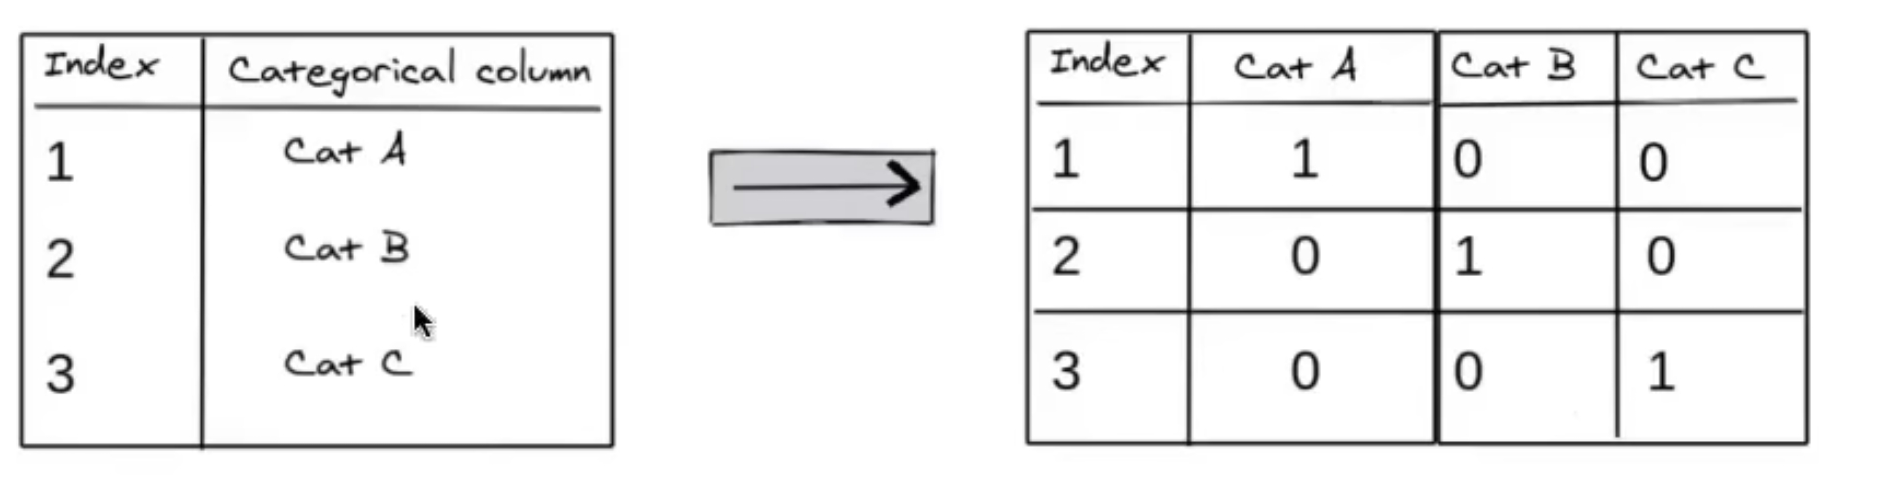

In [76]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [80]:
from sklearn.preprocessing import OneHotEncoder

In [85]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
raw_df2 = raw_df[categorical_cols].fillna('Unknown')

In [86]:
encoder.fit(raw_df2)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [90]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [91]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

In [93]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [94]:
train_inputs[categorical_cols].fillna('Unknown')

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\HELWA\AppData\Local\Temp\ipykernel_22556\3963499034.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\HELWA\AppData\Local\Temp\ipykernel_22556\3963499034.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\HELWA\AppData\Local\Temp\ipykernel_22556\3963499034.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In [95]:
pd.set_option('display.max_columns', None)

In [96]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
92841       GoldCoast  0.698454  0.620553  0.009339     0.066513  0.541354   
99028        Adelaide  0.543814  0.596838  0.000000     0.066513  0.541354   
39155      WaggaWagga  0.435567  0.397233  0.006466     0.004926  0.541354   
23933   NorfolkIsland  0.615979  0.539526  0.000000     0.073892  0.541354   
45549      Wollongong  0.641753  0.492095  0.000000     0.066513  0.541354   
...               ...       ...       ...       ...          ...       ...   
8982            Cobar  0.384021  0.551383  0.000000     0.066513  0.541354   
129497        Walpole  0.445876  0.428854  0.000000     0.066513  0.541354   
138855   AliceSprings  0.363402  0.620553  0.000000     0.123153  0.541354   
11569    CoffsHarbour  0.613402  0.640316  0.000000     0.066513  0.541354   
42410     Williamtown  0.724227  0.743083  0.005029     0.066513  0.541354   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
92841          SSE       0.367188          S          S      0.461538   
99028          WNW       0.187500        NaN        WSW      0.000000   
39155            N       0.203125          N        NNW      0.138462   
23933          ESE       0.187500         SE         SE      0.261538   
45549           NE       0.351562         NE         NE      0.338462   
...            ...            ...        ...        ...           ...   
8982             W       0.164062          S         SW      0.200000   
129497          NW       0.382812        NNW         NW      0.292308   
138855           E       0.265625          E        ESE      0.307692   
11569            E       0.148438        WSW        ESE      0.169231   
42410           NE       0.203125        NNE        ENE      0.200000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
92841       0.430556     0.676768         0.66     0.701169     0.711185   
99028       0.236111     0.717172         0.49     0.722871     0.699499   
39155       0.208333     0.898990         0.63     0.547579     0.535893   
23933       0.236111     0.666667         0.64     0.701169     0.691152   
45549       0.416667     0.828283         0.87     0.749583     0.699499   
...              ...          ...          ...          ...          ...   
8982        0.152778     0.555556         0.30     0.687813     0.651085   
129497      0.208333     0.737374         0.69     0.552588     0.494157   
138855      0.277778     0.252525         0.11     0.671119     0.612688   
11569       0.236111     0.686869         0.60     0.510851     0.495826   
42410       0.263889     0.747475         0.49     0.631052     0.572621   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
92841   0.558734   0.56421  0.662447  0.604040       Yes                0.0   
99028   0.558734   0.56421  0.535865  0.608081        No                1.0   
39155   1.000000   1.00000  0.396624  0.406061       Yes                0.0   
23933   0.250000   0.25000  0.573840  0.539394        No                0.0   
45549   1.000000   1.00000  0.552743  0.492929        No                0.0   
...          ...       ...       ...       ...       ...                ...   
8982    0.558734   0.56421  0.434599  0.551515        No                0.0   
129497  0.558734   0.56421  0.388186  0.418182        No                0.0   
138855  0.558734   0.56421  0.559072  0.632323        No                0.0   
11569   0.558734   0.56421  0.656118  0.646465        No                0.0   
42410   0.125000   0.56421  0.691983  0.753535       Yes                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
92841               0.0              0.0                    0.0   
99028               0.0              0.0                    0.0   
39155               0.0              0.0                    0.0   
23933               0.0              0.0                    0.0   
45

**Saving Processed Data to Disk**

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [97]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (9784, 123)
train_targets: (9784,)
val_inputs: (1699, 123)
val_targets: (1699,)
test_inputs: (2596, 123)
test_targets: (2596,)


In [ ]:
# Parquet adalah format file penyimpanan data yang bersifat columnar (berbasis kolom), 
# berbeda dengan CSV yang berbasis baris.
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [99]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: total: 15.6 ms
Wall time: 21.5 ms


In [102]:
%%time

# We can read the data back using pd.read_parquet.
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: total: 109 ms
Wall time: 801 ms


In [103]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (9784, 123)
train_targets: (9784,)
val_inputs: (1699, 123)
val_targets: (1699,)
test_inputs: (2596, 123)
test_targets: (2596,)


In [104]:
val_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
54362   MountGinini  0.304124  0.201581  0.116379     0.066513  0.541354   
2315         Albury  0.314433  0.333992  0.002874     0.066513  0.541354   
44813    Wollongong  0.425258  0.452569  0.005747     0.066513  0.541354   
60635       Bendigo  0.435567  0.555336  0.005747     0.066513  0.541354   
104761    Nuriootpa  0.479381  0.381423  0.046695     0.024631  0.000000   
...             ...       ...       ...       ...          ...       ...   
32971        Sydney  0.646907  0.592885  0.000000     0.086207  0.680851   
126036   SalmonGums  0.231959  0.567194  0.000000     0.066513  0.541354   
116858   PearceRAAF  0.502577  0.484190  0.069684     0.066513  0.106383   
92623     GoldCoast  0.595361  0.622530  0.002874     0.066513  0.541354   
104925    Nuriootpa  0.273196  0.484190  0.000000     0.066513  0.595745   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
54362          WNW       0.187500          E        NNW      0.107692   
2315           WSW       0.335938          N         SW      0.107692   
44813          WSW       0.234375          W          W      0.261538   
60635          SSE       0.304688          S         SE      0.338462   
104761           E       0.203125          E        ESE      0.261538   
...            ...            ...        ...        ...           ...   
32971          ENE       0.218750        ENE          E      0.061538   
126036         SSW       0.078125          N        SSE      0.107692   
116858          NW       0.437500          N         NW      0.369231   
92623           NW       0.265625         NW          N      0.338462   
104925           W       0.234375         NW          W      0.030769   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
54362       0.180556     0.969697         0.97     0.622889     0.607917   
2315        0.388889     0.868687         0.52     0.699499     0.719533   
44813       0.236111     0.444444         0.40     0.732888     0.756260   
60635       0.277778     0.545455         0.31     0.691152     0.702838   
104761      0.180556     0.929293         0.89     0.657763     0.606010   
...              ...          ...          ...          ...          ...   
32971       0.277778     0.545455         0.48     0.637730     0.607679   
126036      0.083333     0.393939         0.24     0.622889     0.607917   
116858      0.416667     0.808081         0.92     0.442404     0.432387   
92623       0.263889     0.626263         0.51     0.652755     0.584307   
104925      0.333333     0.474747         0.37     0.672788     0.652755   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
54362   0.558734   0.56421  0.244726  0.197980       Yes                0.0   
2315    0.558734   0.12500  0.297468  0.337374        No                0.0   
44813   0.558734   0.56421  0.428270  0.462626       Yes                0.0   
60635   0.125000   0.25000  0.434599  0.555556       Yes                0.0   
104761  1.000000   1.00000  0.398734  0.393939       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
32971   0.625000   0.50000  0.611814  0.604040        No                0.0   
126036  0.558734   0.56421  0.529536  0.581818        No                0.0   
116858  0.125000   1.00000  0.489451  0.424242       Yes                0.0   
92623   0.558734   0.56421  0.597046  0.597980        No                0.0   
104925  0.875000   0.25000  0.445148  0.476768        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
54362               0.0              0.0                    0.0   
2315                0.0              1.0                    0.0   
44813               0.0              0.0                    0.0   
60635               0.0              0.0                    0.0   
104761              0.0 

In [105]:
val_targets

54362     Yes
2315       No
44813      No
60635      No
104761     No
         ... 
32971      No
126036     No
116858    Yes
92623      No
104925     No
Name: RainTomorrow, Length: 1699, dtype: object

**Training a Logistic Regression Model**

Dalam Logistic Regression, model perlu mencari nilai bobot (weights) yang paling akurat dengan cara meminimalkan kesalahan (loss). Proses pencarian ini dilakukan oleh sebuah algoritma optimasi yang disebut Solver.

liblinear (Library for Large Linear Classification) adalah salah satu jenis solver yang disediakan oleh Scikit-Learn.

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
model = LogisticRegression(solver='liblinear')

In [108]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [109]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [ ]:
print(model.coef_.tolist())

# Dalam Logistic Regression, coef_ (singkatan dari coefficients) adalah bobot atau nilai kepentingan yang diberikan model 
# kepada setiap fitur (kolom) input setelah proses latihan (.fit) selesai.

# Anggaplah coef_ sebagai cara model berkata: 
# "Seberapa besar pengaruh variabel ini terhadap peluang terjadinya hujan?"


[[0.3510477261580705, -1.1649576878605525, 1.094929640035515, 0.6987166083187341, -1.7943924600689583, 5.394304032284097, -0.5917081233294421, -0.2781150735304132, 0.7655658079174239, 5.286538087811928, -0.1563906111610185, -3.866795314603619, -0.10276621696439002, 0.9765733617827251, 0.3851990464881652, 0.16947941947389822, 0.4529412650648514, 0.14509121509755554, 0.3901819068371723, 0.33955828764545376, 0.2636956402636156, -0.19912128125000067, -0.33764337382151854, 0.43260790606578725, 0.02227190023165262, -0.3219648362270319, 0.3005037964959387, 0.3881839237091987, -0.30629868561682194, -0.668755608410301, -0.028074130155882206, -0.7200181673131942, -0.22207249853886218, -0.2176979093572694, -0.4229218293335244, -0.39808372244721707, -0.07910414251926096, -0.0402406036738181, -0.014292807436650191, -0.9416380936061353, 0.017588693736501043, 0.055833456155314425, -0.47924241791216643, -0.8699243852085706, -0.20547223860846475, 0.33697597831491655, 0.5827975066401602, 0.8602979516348

In [ ]:
print(model.intercept_)

# intercept_ adalah titik awal atau nilai konstanta dasar dari model

[-2.06535711]


**Analogi Sederhana**

Bayangkan kamu sedang menilai peluang seseorang lulus ujian:
- Fitur ($x$): Jam belajar, kehadiran.
- Koefisien ($coef\_$): Setiap jam belajar menambah peluang lulus.
- Intercept ($intercept\_$): "Bakat alami" seseorang. Meskipun dia tidak belajar sama sekali (jam belajar = 0), dia tetap punya peluang dasar tertentu untuk lulus.


In [114]:
n = len(model.coef_.tolist())

weight_df = pd.DataFrame({
    'feature' : (numeric_cols + encoded_cols),
    'weight' : model.coef_.tolist()[0]
})

In [116]:
pd.DataFrame({
    'feature' : (numeric_cols + encoded_cols),
    'weight' : model.coef_.tolist()[0]
})

feature    weight
0           MinTemp  0.351048
1           MaxTemp -1.164958
2          Rainfall  1.094930
3       Evaporation  0.698717
4          Sunshine -1.794392
..              ...       ...
113    WindDir3pm_W -0.023437
114  WindDir3pm_WNW  0.136606
115  WindDir3pm_WSW -0.347179
116    RainToday_No -1.306000
117   RainToday_Yes -0.759357

[118 rows x 2 columns]

<Axes: xlabel='weight', ylabel='feature'>

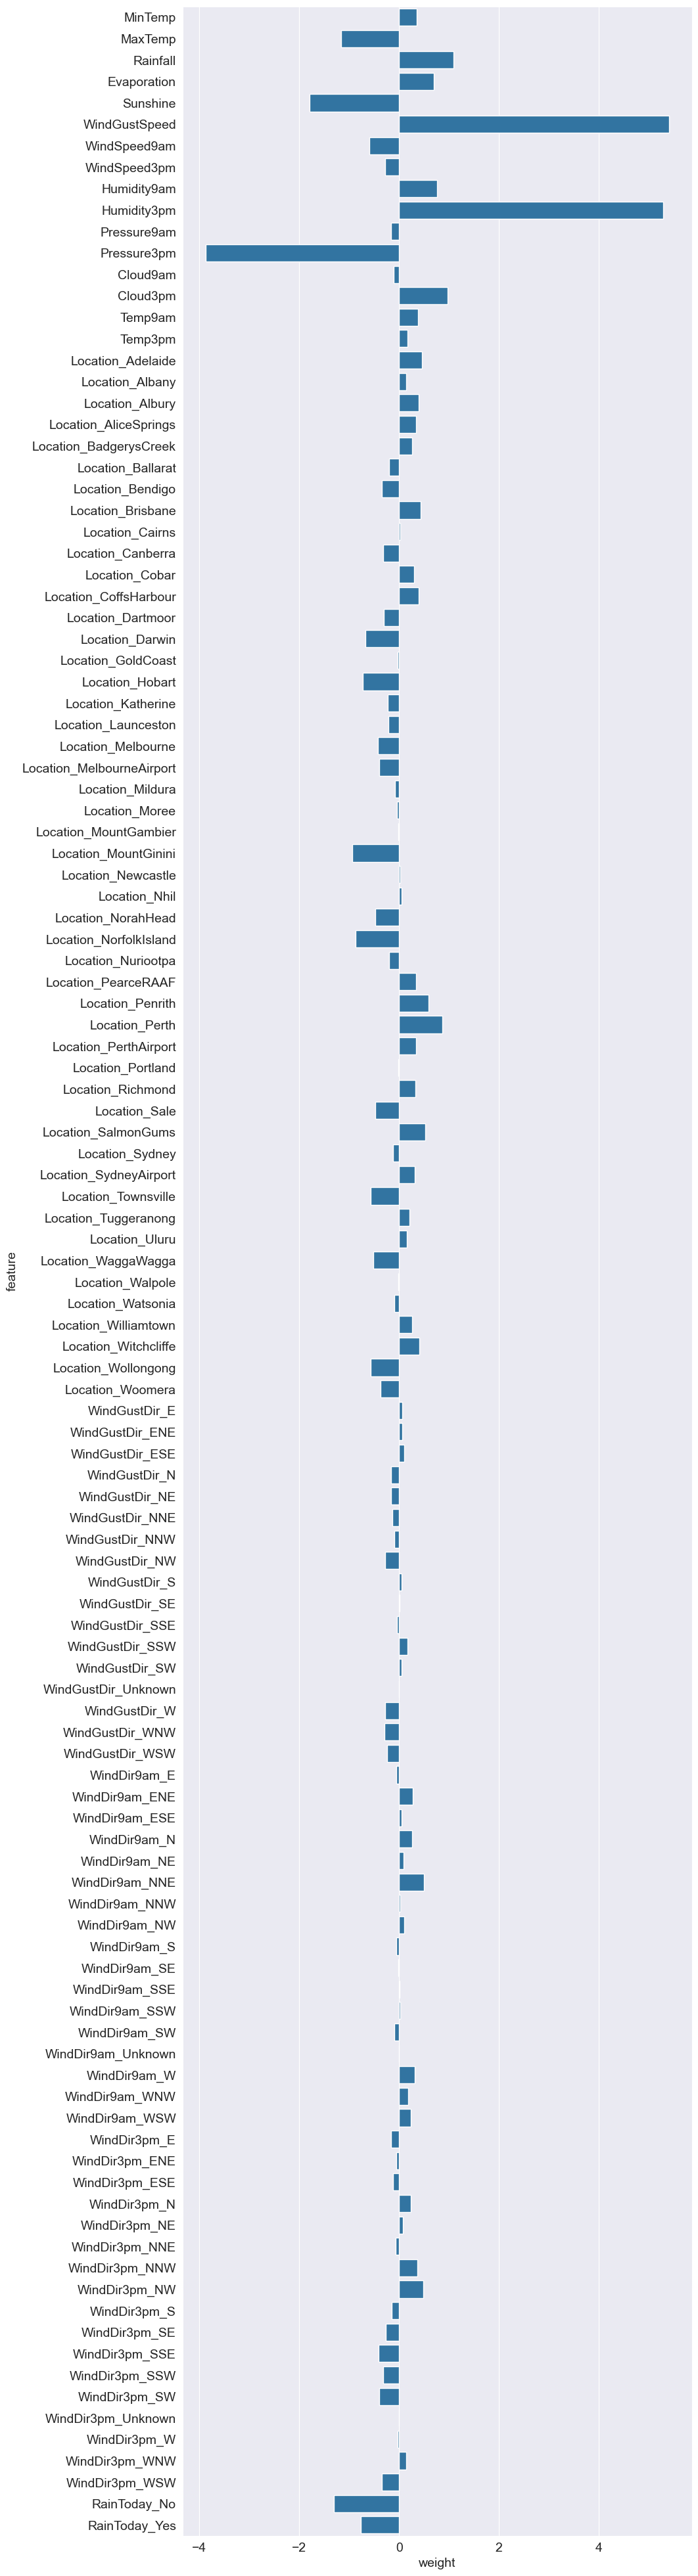

In [115]:
plt.figure(figsize=(10, 50))
sns.barplot(data=weight_df, x='weight', y='feature')

In [118]:
sns.barplot(data=weight_df.sort_values('weight', ascending=False).head(10), x='weight', y='feature')

<Axes: xlabel='weight', ylabel='feature'>

**Making Predictions and Evaluating the Model**

In [112]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [120]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [121]:
train_targets

15724      No
64831      No
71467      No
101126     No
124507     No
         ... 
136579     No
13944      No
50986      No
46065      No
50520     Yes
Name: RainTomorrow, Length: 9784, dtype: object

In [123]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.84688552, 0.15311448],
       [0.97554918, 0.02445082],
       [0.94187438, 0.05812562],
       ...,
       [0.52072893, 0.47927107],
       [0.94825121, 0.05174879],
       [0.96259601, 0.03740399]])

In [124]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [122]:
from sklearn.metrics import accuracy_score

In [125]:
accuracy_score(train_targets, train_preds)

0.8563982011447261

**Confusion Matrix**



In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.95022921, 0.04977079],
       [0.47696603, 0.52303397]])

**Membedah Angka Matriks**



**Analisis Kualitas Model**

1. Sangat Jago Menebak Hari Cerah (Class 0) Angka 0.950 (95%) di kiri atas sangat bagus. Artinya, jika hari aslinya tidak hujan, modelmu hampir selalu benar (95% akurat) dalam menebak "Tidak Hujan".

2. Kesulitan Menebak Hari Hujan (Class 1) — Masalah Utama! Lihat angka di kanan bawah: 0.523 (52%). Artinya, dari semua hari yang sebenarnya hujan, modelmu hanya berhasil menangkap 52% di antaranya. Sisanya (47.6%) salah ditebak sebagai "Tidak Hujan" (False Negative).

Kesimpulan Kualitas: Modelmu saat ini bersifat "Sangat Konservatif". Dia sangat yakin kalau cuaca cerah, tapi dia sering melewatkan tanda-tanda hujan. Tebakannya untuk hari hujan hampir mirip dengan lempar koin (hanya sedikit di atas 50%).

In [128]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 85.64%


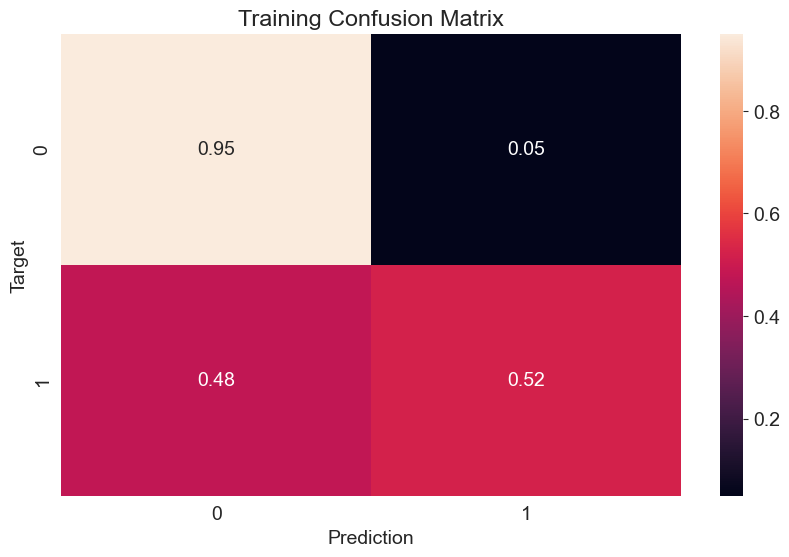

In [129]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

In [130]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 85.29%


Accuracy: 84.98%


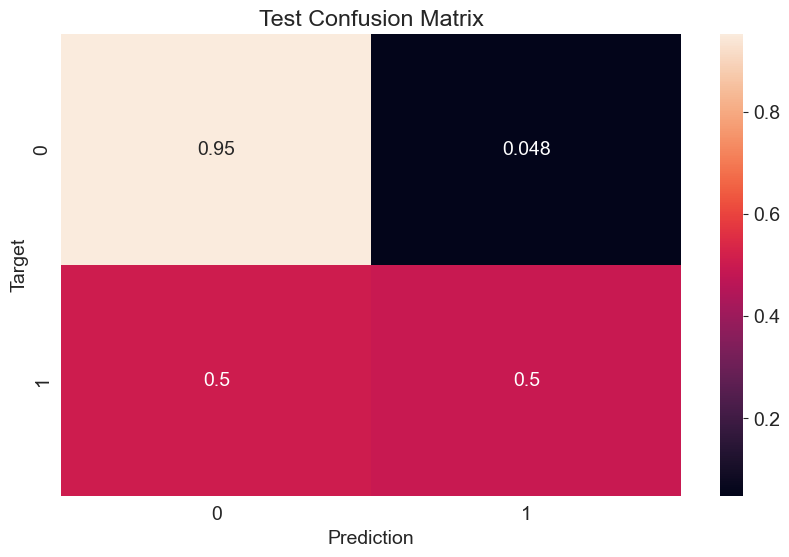

In [131]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [132]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [133]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [134]:
random_guess(X_val)

array(['No', 'No', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype='<U3')

In [135]:
all_no(X_val)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

In [136]:
accuracy_score(test_targets, random_guess(X_test))

0.5069337442218799

In [137]:
accuracy_score(test_targets, all_no(X_test))

0.7754237288135594

**Making Predictions on a Single Input**

In [138]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [139]:
new_input_df = pd.DataFrame([new_input])
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

In [140]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

C:\Users\HELWA\AppData\Local\Temp\ipykernel_22556\4090555460.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\HELWA\AppData\Local\Temp\ipykernel_22556\4090555460.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\HELWA\AppData\Local\Temp\ipykernel_22556\4090555460.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In [141]:
new_input_df

Date   Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine  0.793814  0.750988  0.036638     0.051724  0.541354   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW       0.351562         NW        NNE           0.2   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0      0.277778     0.888889         0.58     0.405676     0.375626       1.0   

   Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  Location_Albany  \
0     0.625  0.694093  0.775758       Yes                0.0              0.0   

   Location_Albury  Location_AliceSprings  Location_BadgerysCreek  \
0              0.0                    0.0                     0.0   

   Location_Ballarat  Location_Bendigo  Location_Brisbane  Location_Cairns  \
0                0.0               0.0                0.0              0.0   

   Location_Canberra  Location_Cobar  Location_CoffsHarbour  \
0                0.0             0.0                    0.0   

   Location_Dartmoor  Location_Darwin  Location_GoldCoast  Location_Hobart  \
0                0.0              0.0                 0.0              0.0   

   Location_Katherine  Location_Launceston  Location_Melbourne  \
0                 1.0                  0.0                 0.0   

   Location_MelbourneAirport  Location_Mildura  Location_Moree  \
0                        0.0               0.0             0.0   

   Location_MountGambier  Location_MountGinini  Location_Newcastle  \
0                    0.0                   0.0                 0.0   

   Location_Nhil  Location_NorahHead  Location_NorfolkIsland  \
0            0.0                 0.0                     0.0   

   Location_Nuriootpa  Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                 0.0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_Unknown  WindGustDir_W  \
0              0.0             0.0                  0.0            0.0   

   WindGustDir_WNW  WindGustDir_WSW  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_Unknown  WindDir9am_W  \
0             0.0            0.0                 0.0           0.0   

   WindDir9am_WNW  WindDir9am_WSW  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1

In [142]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.793814  0.750988  0.036638     0.051724  0.541354       0.351562   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.2      0.277778     0.888889         0.58     0.405676   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  Location_Adelaide  \
0     0.375626       1.0     0.625  0.694093  0.775758                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              0.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 1.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_Unknown  WindGustDir_W  \
0              0.0             0.0                  0.0            0.0   

   WindGustDir_WNW  WindGustDir_WSW  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_Unknown  WindDir9am_W  \
0             0.0            0.0                 0.0           0.0   

   WindDir9am_WNW  WindDir9am_WSW  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0            0.0         

In [143]:
prediction = model.predict(X_new_input)[0]
prediction

'Yes'

In [144]:
prob = model.predict_proba(X_new_input)[0]
prob

array([0.43787129, 0.56212871])

In [145]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [146]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [147]:
predict_input(new_input)

C:\Users\HELWA\AppData\Local\Temp\ipykernel_22556\2435838903.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\HELWA\AppData\Local\Temp\ipykernel_22556\2435838903.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\HELWA\AppData\Local\Temp\ipykernel_22556\2435838903.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

('Yes', np.float64(0.5632051766539518))